<h2 style='text-align:center;'><b>UNIVERSIDADE DE SÃO PAULO (USP)</b></h2>
<h2 style='text-align:center;'>Faculdade de Economia, Administração e Contabilidade - FEA-USP</h2>
<h3 style='text-align:center;'>Aluno: Ronisson Lucas Calmon da Conceição</h3>
<h3 style='text-align:center;'>Disciplina: EAE 6061 – Modelos Aplicados de Equilíbrio Geral I </h3><br><br>
<h3 style='text-align:center;'>Relatório</h3>

<p style='text-align:justify;'>Este relatório apresenta os resultados obtidos através do cálculo dos índices de ligação para frente e para trás para os setores econômicos do Brasil e identifica os setores-chave. Utiliza-se a Matriz de Insumo-Produto do Brasil, 2017.</p> 
<p style='text-align:justify;'>Identificou-se os setores em quatro segmentos: setores dependentes de outros ($U_{j}>1$ e $U_{i}>1$); setores dependentes da demanda intersetorial ($U_{i}>1$); setores independentes de outros, ou seja, não fortemente conectados a outros; setores dependentes da oferta intersetorial ($U_{j}>1$).</p> 
<p>Foram identificados os seguintes setores-chaves: </p>


* S5 - Extração de petróleo e gás, inclusive as atividades de apoio; 
* S17 - Fabricação de celulose, papel e produtos de papel; 
* S19 - Refino de petróleo e coquerias; 
* S21 - Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros; 
* S22 - Fabricação de defensivos, desinfestantes, tintas e químicos diversos; 
* S25 - Fabricação de produtos de borracha e de material plástico; 
* S27 - Produção de ferro-gusa/ferroligas, siderurgia e tubos de aço sem costura; 
* S29 - Fabricação de produtos de metal, exceto máquinas e equipamentos; 
* S37 - Manutenção, reparação e instalação de máquinas e equipamentos; 
* S38 - Energia elétrica, gás natural e outras utilidades; 
* S43 - Transporte terrestre; 
* S50 - Atividades de televisão, rádio, cinema e  gravação/edição de som e imagem; 
* S57 - Outras atividades profissionais, científicas e técnicas. <br>

Nota metodológica

Com base no modeo aberto de Leontief calcula-se os índices de ligação de Rasmussen-Hirschman, para determinar os setores com maior poder de encadeamento. O índice de ligação para trás mensura o encadeamento de quanto um determinado setor demanda de outros setores. O índice de ligação para frente mede o quanto um setor é demandado por outros setores da economia.

Índice de Ligação para trás:

$U_{j} = \dfrac{\dfrac{B_{*j}}{n}}{B^{*}} $

Onde:

$B_{*j} = \sum_{i=1}^{n} b_{ij}$

$B^{*} = \dfrac{\sum_{i=1}^{n} \sum_{j}^{j}b_{ij}}{n^{2}}$

Índice de Ligação para frente:

$U_{i} = \dfrac{\dfrac{B_{i*}}{n}}{B^{*}}$

Onde:

$B_{i*} = \sum_{j=1}^{n}b_{ij}$

$B^{*} = \sum_{i=1}^{n}\sum_{j}^{j}b_{ij}$

Importando as bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import pymrio
import matplotlib.pyplot as plt

Carregando a matriz Insumo-Produto brasileira de 2017:

In [2]:
data=pd.read_excel('data.xlsx')
del data['S']

In [3]:
Z = data.iloc[:68,:68]  #seleciona o consumo intermediário
VBP = data.loc[91][0:68]  #valor bruto da produção
matrix_A = pymrio.calc_A(Z,VBP)  #calcula a matriz de coeficientes técnicos
matrix_L = pymrio.calc_L(matrix_A)  #calcula a matriz de Leontief

mean = matrix_L.values.mean()  #calcula a média da matriz de Leontief
Uj = matrix_L.mean()/mean  #Índice de Ligação para Trás
Uj = Uj.reindex(range(1,69))
Ui = matrix_L.mean(axis=1)/mean  #Índice de Ligação para Frente

#construção do par ordenado setor,índice
u_i=[('S'+f'{i}',v)for i,v in enumerate(Ui,start=1)]  
u_j=[('S'+f'{i}',v) for i,v in enumerate(Uj,start=1)]
x=[v for i,v in u_i]
y=[v for i,v in u_j]
s=['S'+f'{i}' for i in range(1,69)]

#validação dos setores-chave
key_sectors=[]

for v in list(zip(s,Ui,Uj)):
    if v[1]>1 and v[2]>1:
        key_sectors.append(v[0])


Classificação setorial:

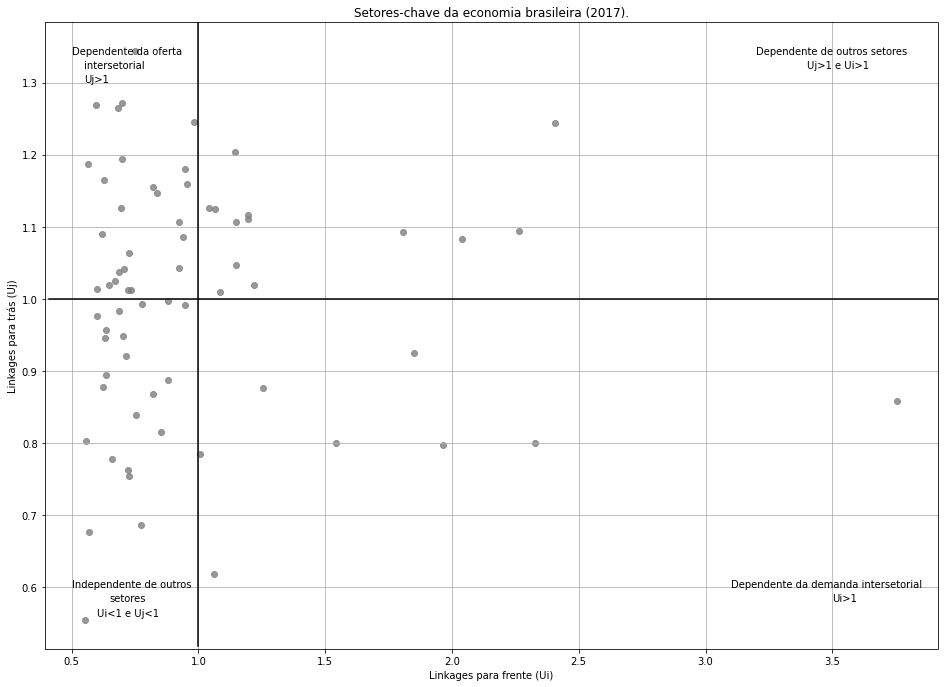

In [4]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.text(3.2, 1.34, 'Dependente de outros setores', style='normal',)
ax.text(3.4, 1.32, 'Uj>1 e Ui>1', style='normal',)

ax.text(0.5, 1.34, 'Dependente da oferta', style='normal',)
ax.text(0.55, 1.32, 'intersetorial', style='normal',)
ax.text(0.55, 1.3, 'Uj>1', style='normal',)

ax.text(3.1, 0.6, 'Dependente da demanda intersetorial', style='normal',)
ax.text(3.5, 0.58, 'Ui>1', style='normal',)


ax.text(0.5, 0.6, 'Independente de outros', style='normal',)
ax.text(0.65, 0.58, 'setores', style='normal',)
ax.text(0.6, 0.56, 'Ui<1 e Uj<1', style='normal',)

plt.title('Setores-chave da economia brasileira (2017).')
plt.scatter(x , y,alpha=0.8,color='gray')

plt.axhline(y=1, xmin=0.005, xmax=1,color='black')
plt.axvline(x=1, ymin=0.005, ymax=1,color='black')
plt.xlabel('Linkages para frente (Ui)')
plt.ylabel('Linkages para trás (Uj)')
plt.grid()
plt.savefig('fig1.jpeg')
plt.show()